In [1]:
import math

import matplotlib as mpl
mpl.rcParams['text.usetex'] = True 
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}', r'\usepackage{newtxmath}'] 
mpl.rc('font', family='serif')

import numpy as np
import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt
from matplotlib import rc

from cycler import cycler


mpl.rcParams['ps.usedistiller'] = 'xpdf' 

plt.style.use('seaborn-notebook')
# sns.set_palette("Blues_r")

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['legend.fontsize'] = '15'
plt.rcParams['xtick.labelsize'] = '15'
plt.rcParams['ytick.labelsize'] = '15'

monochrome=(cycler('color', sns.color_palette("husl", 8))*2+(cycler('marker', ['v', 's', "o"])*7)[0:16])
plt.rc('axes', prop_cycle=monochrome)

pd.options.display.max_rows = 999

<ipython-input-1-56d1c1821bb1>:5: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{libertine}', r'\usepackage{newtxmath}']


In [2]:
# Change if required
folder = "../experiments/2021-06-09-14-15_BanditNonStaticGradualGlobal_ADWIN_"
dataset = "GradualGlobal_ADWIN"

In [3]:
masterdata = pd.read_csv("%s/BanditNonStaticGradualGlobal_ADWIN.csv"%folder, sep=",")
narms = masterdata.iloc[0]['k']

In [4]:
sorted(masterdata.bandit.unique())

['CustomOracle',
 'MP-ADR-Elimination-UCB-ADWIN1; d=0.001',
 'MP-ADR-Elimination-UCB-ADWIN1; d=0.01',
 'MP-ADR-Elimination-UCB-ADWIN1; d=0.1',
 'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-4',
 'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-5',
 'MP-ADS-TS-ADWIN1; d=0.001; r=false',
 'MP-ADS-TS-ADWIN1; d=0.001; r=true',
 'MP-ADS-TS-ADWIN1; d=0.01; r=false',
 'MP-ADS-TS-ADWIN1; d=0.01; r=true',
 'MP-ADS-TS-ADWIN1; d=0.1; r=false',
 'MP-ADS-TS-ADWIN1; d=0.1; r=true',
 'MP-ADS-TS-ADWIN1; d=1.0E-4; r=false',
 'MP-ADS-TS-ADWIN1; d=1.0E-4; r=true',
 'MP-ADS-TS-ADWIN1; d=1.0E-5; r=false',
 'MP-ADS-TS-ADWIN1; d=1.0E-5; r=true',
 'OD',
 'OR',
 'OS']

In [5]:
sorted(masterdata.dataset.unique())

['GradualGlobalGenerator-100']

In [6]:
masterdata.columns

Index(['bandit', 'dataset', 'scalingstrategy', 'k', 'gain', 'cputime',
       'historylength', 'iteration'],
      dtype='object')

In [7]:
masterdata['reward/arm'] = masterdata['gain']/masterdata['k']

In [8]:
masterdata.shape

(570000, 9)

In [9]:
masterdata.groupby(["scalingstrategy", "bandit", "dataset"])[['gain', 'k', 'reward/arm', 'cputime']].mean()

gain  \
scalingstrategy bandit                                  dataset                                
No-1            CustomOracle                            GradualGlobalGenerator-100  0.752587   
                MP-ADR-Elimination-UCB-ADWIN1; d=0.001  GradualGlobalGenerator-100  0.575348   
                MP-ADR-Elimination-UCB-ADWIN1; d=0.01   GradualGlobalGenerator-100  0.574460   
                MP-ADR-Elimination-UCB-ADWIN1; d=0.1    GradualGlobalGenerator-100  0.550330   
                MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-4 GradualGlobalGenerator-100  0.571435   
                MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-5 GradualGlobalGenerator-100  0.578574   
                MP-ADS-TS-ADWIN1; d=0.001; r=false      GradualGlobalGenerator-100  0.675554   
                MP-ADS-TS-ADWIN1; d=0.001; r=true       GradualGlobalGenerator-100  0.671559   
                MP-ADS-TS-ADWIN1; d=0.01; r=false       GradualGlobalGenerator-100  0.673214   
                MP-ADS-TS-ADWIN1; d=0.01; r=true        GradualGlobalGenerator-100  0.661436   
                MP-ADS-TS-ADWIN1; d=0.1; r=false        GradualGlobalGenerator-100  0.668326   
                MP-ADS-TS-ADWIN1; d=0.1; r=true         GradualGlobalGenerator-100  0.619143   
                MP-ADS-TS-ADWIN1; d=1.0E-4; r=false     GradualGlobalGenerator-100  0.676508   
                MP-ADS-TS-ADWIN1; d=1.0E-4; r=true      GradualGlobalGenerator-100  0.680719   
                MP-ADS-TS-ADWIN1; d=1.0E-5; r=false     GradualGlobalGenerator-100  0.677285   
                MP-ADS-TS-ADWIN1; d=1.0E-5; r=true      GradualGlobalGenerator-100  0.682073   
                OD                                      GradualGlobalGenerator-100  1.004994   
                OR                                      GradualGlobalGenerator-100  0.504510   
                OS                                      GradualGlobalGenerator-100  0.516934   
No-2            CustomOracle                            GradualGlobalGenerator-100  1.495155   
                MP-ADR-Elimination-UCB-ADWIN1; d=0.001  GradualGlobalGenerator-100  1.191899   
                MP-ADR-Elimination-UCB-ADWIN1; d=0.01   GradualGlobalGenerator-100  1.172470   
                MP-ADR-Elimination-UCB-ADWIN1; d=0.1    GradualGlobalGenerator-100  1.100417   
                MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-4 GradualGlobalGenerator-100  1.215329   
                MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-5 GradualGlobalGenerator-100  1.200264   
                MP-ADS-TS-ADWIN1; d=0.001; r=false      GradualGlobalGenerator-100  1.374238   
                MP-ADS-TS-ADWIN1; d=0.001; r=true       GradualGlobalGenerator-100  1.355053   
                MP-ADS-TS-ADWIN1; d=0.01; r=false       GradualGlobalGenerator-100  1.371008   
                MP-ADS-TS-ADWIN1; d=0.01; r=true        GradualGlobalGenerator-100  1.341985   
                MP-ADS-TS-ADWIN1; d=0.1; r=false        GradualGlobalGenerator-100  1.358949   
                MP-ADS-TS-ADWIN1; d=0.1; r=true         GradualGlobalGenerator-100  1.236915   
                MP-ADS-TS-ADWIN1; d=1.0E-4; r=false     GradualGlobalGenerator-100  1.380345   
                MP-ADS-TS-ADWIN1; d=1.0E-4; r=true      GradualGlobalGenerator-100  1.361786   
                MP-ADS-TS-ADWIN1; d=1.0E-5; r=false     GradualGlobalGenerator-100  1.381323   
                MP-ADS-TS-ADWIN1; d=1.0E-5; r=true      GradualGlobalGenerator-100  1.369941   
                OD                                      GradualGlobalGenerator-100  2.004894   
                OR                                      GradualGlobalGenerator-100  1.003442   
                OS                                      GradualGlobalGenerator-100  1.027096   
No-5            CustomOracle                            GradualGlobalGenerator-100  3.692494   
                MP-ADR-Elimination-UCB-ADWIN1; d=0.001  GradualGlobalGenerator-100  3.099878   
                MP-ADR-Elimination-UCB-ADWIN1; d=0.01   

In [10]:
from matplotlib.markers import TICKLEFT, TICKRIGHT, TICKUP, TICKDOWN, CARETLEFT, CARETRIGHT, CARETUP, CARETDOWN
markers = [
#    '.',
#    ',',
    'v',
    '<',
    '^',
    '>',
    'o',
#    '1',
#    '2',
#    '3',
#    '4',
#    '8',
    's',
    'p',
    '*',
#    'h',
    'H',
    '+',
    'x',
    'D',
#    'd',
    '|',
    '_',
    TICKLEFT,
    TICKRIGHT,
    TICKUP,
    TICKDOWN,
    CARETLEFT,
    CARETRIGHT,
    CARETUP,
    CARETDOWN,
]
 

In [11]:
from matplotlib import cm
colors = [cm.Reds((i+2)/4.0) for i in range(4)] + [cm.Greens((i+2)/4.0) for i in range(4)]

In [12]:
algs = [    
    # ours 
#     'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-5',
#     'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-4',
#     'MP-ADR-Elimination-UCB-ADWIN1; d=0.001',
#     'MP-ADR-Elimination-UCB-ADWIN1; d=0.01',
#     'MP-ADR-Elimination-UCB-ADWIN1; d=0.1',
    
     'MP-ADS-TS-ADWIN1; d=0.1; r=false',
     'MP-ADS-TS-ADWIN1; d=0.01; r=false',
     'MP-ADS-TS-ADWIN1; d=0.001; r=false',
     'MP-ADS-TS-ADWIN1; d=1.0E-4; r=false',
#     'MP-ADS-TS-ADWIN1; d=1.0E-5; r=false',
    
     'MP-ADS-TS-ADWIN1; d=0.1; r=true',
     'MP-ADS-TS-ADWIN1; d=0.01; r=true',
     'MP-ADS-TS-ADWIN1; d=0.001; r=true',
    'MP-ADS-TS-ADWIN1; d=1.0E-4; r=true',
#    'MP-ADS-TS-ADWIN1; d=1.0E-5; r=true',
]

In [13]:
prettynames = {
     
     
#     'MP-ADR-Elimination-UCB-ADWIN1; d=0.1':'ADR-Elimination-UCB; d=0.1',
#     'MP-ADR-Elimination-UCB-ADWIN1; d=0.01':'ADR-Elimination-UCB; d=0.01',
#     'MP-ADR-Elimination-UCB-ADWIN1; d=0.001':'ADR-Elimination-UCB; d=0.001',
#     'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-4':'ADR-Elimination-UCB; d=1.0E-4',
#     'MP-ADR-Elimination-UCB-ADWIN1; d=1.0E-5':'ADR-Elimination-UCB; d=1.0E-5',
    
     'MP-ADS-TS-ADWIN1; d=0.1; r=false':'ADS-TS; $\delta$=0.1',
     'MP-ADS-TS-ADWIN1; d=0.01; r=false':'ADS-TS; $\delta$=0.01',
     'MP-ADS-TS-ADWIN1; d=0.001; r=false':'ADS-TS; $\delta$=0.001',
     'MP-ADS-TS-ADWIN1; d=1.0E-4; r=false':'ADS-TS; $\delta$=1.0E-4',
#     'MP-ADS-TS-ADWIN1; d=1.0E-5; r=false':'ADS-TS; d=1.0E-5',
    
     'MP-ADS-TS-ADWIN1; d=0.1; r=true':'ADR-TS; $\delta$=0.1',
     'MP-ADS-TS-ADWIN1; d=0.01; r=true':'ADR-TS; $\delta$=0.01',
     'MP-ADS-TS-ADWIN1; d=0.001; r=true':'ADR-TS; $\delta$=0.001',
    'MP-ADS-TS-ADWIN1; d=1.0E-4; r=true':'ADR-TS; $\delta$=1.0E-4',
#    'MP-ADS-TS-ADWIN1; d=1.0E-5; r=true':'ADR-TS; d=1.0E-5',
}

In [14]:
# compute regret against 'OD', or just the cumulative rewards

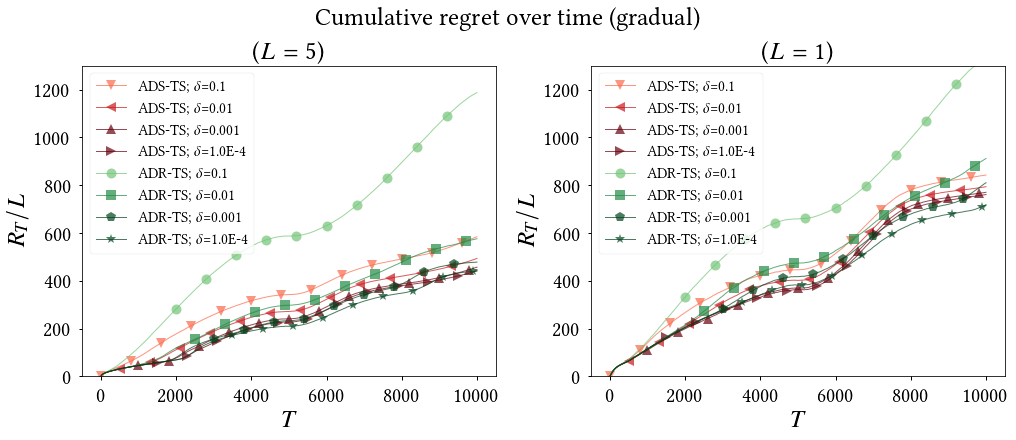

In [15]:
#  constrained_layout=True is for reducing space
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(14,6), constrained_layout=True) 

L = 5


dataset = 'GradualGlobalGenerator-100'

plt.sca(axes[0])

i = 0

subdata = masterdata[masterdata["scalingstrategy"] == "No-%s"%L]

for bandit in algs:
    toplot = subdata[subdata["bandit"] == bandit]
    cumsum = toplot.gain.cumsum().reset_index(drop=True)
    
subdata = masterdata[masterdata["scalingstrategy"] == "No-%s"%L]
oracle = subdata[subdata["bandit"] == "CustomOracle"].gain.cumsum().reset_index(drop=True)
for bandit in algs:
    toplot = subdata[subdata["bandit"] == bandit]
    cumsum = toplot.gain.cumsum().reset_index(drop=True)
    ((oracle-cumsum)/L).plot(label=prettynames[bandit],linewidth=1, alpha=0.7,
                             markevery=(i*500,800), marker=markers[i], markersize=10, color=colors[i])
    i+=1

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(ncol=1)
plt.ylabel("$R_T / L$")
plt.title("($L = %s$)"%L)
plt.xlabel("$T$")
plt.ylim((0,1300))

L = 1

plt.sca(axes[1])

i = 0

subdata = masterdata[masterdata["scalingstrategy"] == "No-%s"%L]

for bandit in algs:
    toplot = subdata[subdata["bandit"] == bandit]
    cumsum = toplot.gain.cumsum().reset_index(drop=True)
    
subdata = masterdata[masterdata["scalingstrategy"] == "No-%s"%L]
oracle = subdata[subdata["bandit"] == "CustomOracle"].gain.cumsum().reset_index(drop=True)
for bandit in algs:
    toplot = subdata[subdata["bandit"] == bandit]
    cumsum = toplot.gain.cumsum().reset_index(drop=True)
    ((oracle-cumsum)/L).plot(label=prettynames[bandit],linewidth=1, alpha=0.7,
                             markevery=(i*500,800), marker=markers[i], markersize=10, color=colors[i])
    i+=1

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(ncol=1)
plt.ylabel("$R_T / L$")
plt.title("($L = %s$)"%L)
plt.xlabel("$T$")
plt.ylim((0,1300))

plt.suptitle("Cumulative regret over time (gradual)", fontsize=25)
plt.savefig("plots/ours_regret_gradual_Fig8b.pdf")

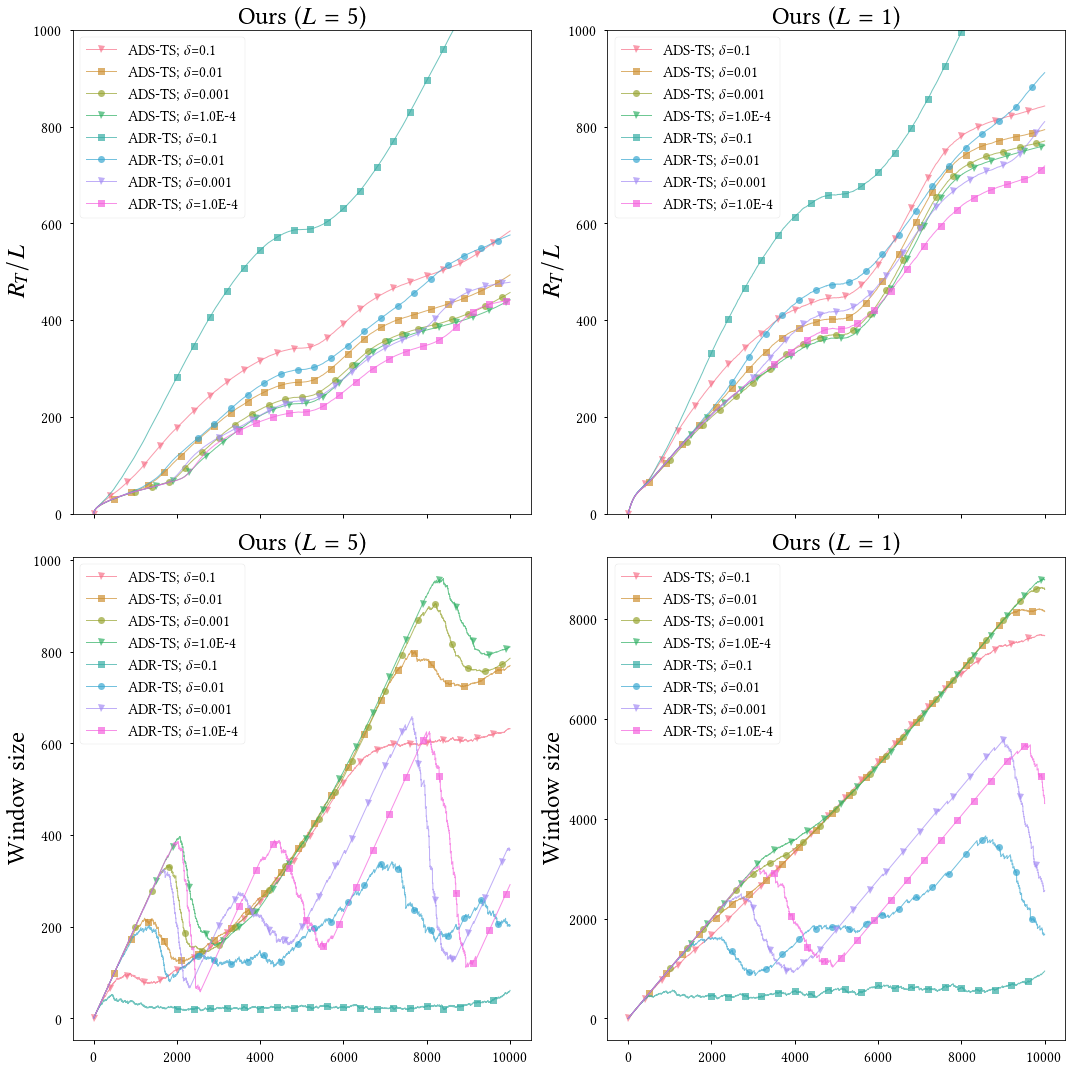

In [16]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(15,15))

L = 5


dataset = 'GradualGlobalGenerator-100'

plt.sca(axes[0][0])

i = 0

subdata = masterdata[masterdata["scalingstrategy"] == "No-%s"%L]

for bandit in algs:
    toplot = subdata[subdata["bandit"] == bandit]
    cumsum = toplot.gain.cumsum().reset_index(drop=True)
    
subdata = masterdata[masterdata["scalingstrategy"] == "No-%s"%L]
oracle = subdata[subdata["bandit"] == "CustomOracle"].gain.cumsum().reset_index(drop=True)
for bandit in algs:
    toplot = subdata[subdata["bandit"] == bandit]
    cumsum = toplot.gain.cumsum().reset_index(drop=True)
    ((oracle-cumsum)/L).plot(label=prettynames[bandit],linewidth=1, alpha=0.7, markevery=(i*500,400))
    i+=1

plt.legend(ncol=1,loc="upper left")
plt.ylabel("$R_T / L$")
plt.title("Ours ($L = %s$)"%L)
plt.ylim((0,1000))

plt.sca(axes[1][0])

i = 0
subdata = masterdata[masterdata["scalingstrategy"] == "No-%s"%L]
for bandit in algs:
    toplot = subdata[subdata["bandit"] == bandit]
    cumsum = toplot.historylength.reset_index(drop=True)/L
    cumsum.plot(label=prettynames[bandit],linewidth=1, alpha=0.7, markevery=(i*500,400))
    i+=1
plt.legend(ncol=1,loc="upper left")
plt.ylabel("Window size")
plt.title("Ours ($L = %s$)"%L)

L = 1

plt.sca(axes[0][1])

i = 0

subdata = masterdata[masterdata["scalingstrategy"] == "No-%s"%L]

for bandit in algs:
    toplot = subdata[subdata["bandit"] == bandit]
    cumsum = toplot.gain.cumsum().reset_index(drop=True)
    
subdata = masterdata[masterdata["scalingstrategy"] == "No-%s"%L]
oracle = subdata[subdata["bandit"] == "CustomOracle"].gain.cumsum().reset_index(drop=True)
for bandit in algs:
    toplot = subdata[subdata["bandit"] == bandit]
    cumsum = toplot.gain.cumsum().reset_index(drop=True)
    ((oracle-cumsum)/L).plot(label=prettynames[bandit],linewidth=1, alpha=0.7, markevery=(i*500,400))
    i+=1

plt.legend(ncol=1,loc="upper left")
plt.ylabel("$R_T / L$")
plt.title("Ours ($L = %s$)"%L)
plt.ylim((0,1000))

plt.sca(axes[1][1])

i = 0
subdata = masterdata[masterdata["scalingstrategy"] == "No-%s"%L]
for bandit in algs:
    toplot = subdata[subdata["bandit"] == bandit]
    cumsum = toplot.historylength.reset_index(drop=True)/L
    cumsum.plot(label=prettynames[bandit],linewidth=1, alpha=0.7, markevery=(i*500,400))
    i+=1
plt.legend(ncol=1,loc="upper left")
plt.ylabel("Window size")
plt.title("Ours ($L = %s$)"%L)

plt.tight_layout()
plt.savefig("plots/ours_regret_gradual_full.pdf")